In [1]:
# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [8]:
## Bits to transport
c = "1"
d = "1"

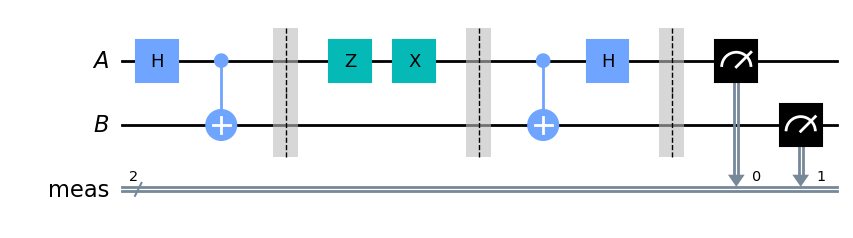

In [21]:
A = QuantumRegister(1,"A")
B = QuantumRegister(1,"B")
protocol = QuantumCircuit(A, B)

## o+ state
protocol.h(0)
protocol.cx(0,1)
protocol.barrier()

## Alice's operations
if d == "1":
    protocol.z(0)
if c == "1":
    protocol.x(0)
protocol.barrier()

## Bob's operations
protocol.cx(0,1)
protocol.h(0)
protocol.measure_all()

display(protocol.draw("mpl"))

Measured 11 with frequency 1.0


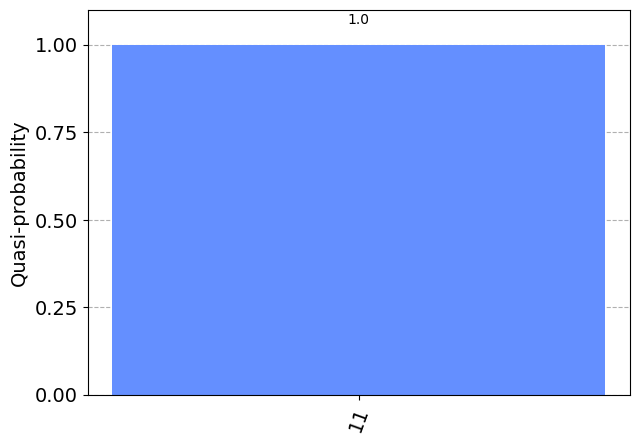

In [22]:
result = Sampler().run(protocol).result()
statistics = result.quasi_dists[0].binary_probabilities()

for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")

display(plot_histogram(statistics))